# Desafío - Estimando curvas normales

# 1. Importe un csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("subsample_FASC_demo.csv").drop(columns = "Unnamed: 0")
df.head()

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,Barbados,0.794,BRB,Caribbean,22888.9710,0.279,16.900000,8.82,7.000000,7.469303
1,Zambia,0.576,ZMB,SubSaharian,1916.7900,NaN,56.400002,2.41,15.900000,4.986765
2,Albania,0.762,ALB,EastEurope,8516.7002,NaN,15.000000,4.51,29.700001,5.883105
3,Seychelles,0.781,SYC,SubSaharian,9583.3203,0.090,11.200000,9.72,26.700001,3.369817
4,Belarus,0.798,BLR,EastEurope,17780.6410,9.468,NaN,13.94,27.900000,5.687722


# 2. Importe su conjunto de funciones

In [5]:
from ancilliary_funcs import funcion3a, funcion3b

for i in df.columns:
    print(f"El par de (cantidad de 'NaN', porcentaje de perdidos) para la función {i} es :{funcion3a(df,i)}")


El par de (cantidad de 'NaN', porcentaje de perdidos) para la función cname es :[0, 0.0]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función undp_hdi es :[4, 0.041237113402061855]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función ccodealp es :[0, 0.0]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función ht_region es :[0, 0.0]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función gle_cgdpc es :[0, 0.0]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función imf_pop es :[25, 0.25773195876288657]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función wef_imort es :[24, 0.24742268041237114]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función who_alc2000 es :[5, 0.05154639175257732]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función who_tobt es :[29, 0.29896907216494845]
El par de (cantidad de 'NaN', porcentaje de perdidos) para la función wdi_exph es :[2,

# 3. Estime el puntaje Z de una variable

In [3]:
#Seleccionamos la variables NUMERICAS que no tenga datos perdidos, o que tenga la menor cantidad
numerics = df.dtypes.reset_index().rename(columns = {'index': "column", 0:'type'})
numerics = list(numerics[(numerics['type'] == 'float') | (numerics['type'] == 'int')]['column'])

#Respondemos:
print(f"Las variables sólo numericas son: {numerics}")
print(f"La variable con menor cantidad de datos perdidos es {list(df[numerics].isnull().sum().sort_values()[0:1].index)[0]}")

#Obtengo el puntaje Z ordenado
df = df.dropna(subset = ['gle_cgdpc']).sort_values(by = 'gle_cgdpc').reset_index(drop = True)
df['gle_cgdpc_z'] = (df['gle_cgdpc']-df['gle_cgdpc'].mean())/np.std(df['gle_cgdpc'])

#imprimo las últimas y primeras filas de tanto gle_cgdpc como de su valor z correspondiente
glems = ['gle_cgdpc','gle_cgdpc_z']
print(df[glems].head(5).append(df[glems].tail(5)))
print("""
1) Que el puntaje Z es directamente proporcional al valor de la variable
2) Sinceramente no sé que más""")

Las variables sólo numericas son: ['undp_hdi', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
La variable con menor cantidad de datos perdidos es gle_cgdpc
       gle_cgdpc  gle_cgdpc_z
0      332.26999    -0.789316
1      488.26999    -0.779451
2      852.39001    -0.756427
3      900.77002    -0.753368
4      961.26001    -0.749543
92   46103.84000     2.104960
93   47769.69900     2.210297
94   50454.41000     2.380059
95   54268.14800     2.621213
96  108481.13000     6.049265

1) Que el puntaje Z es directamente proporcional al valor de la variable
2) Sinceramente no sé que más


# 4. Estime el puntaje z de las regiones

Text(0.5, 1.0, 'gle_cgdpc_z por región y su media')

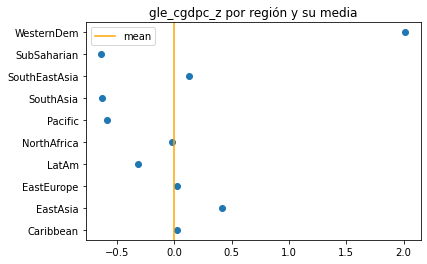

In [4]:
grouped = df.groupby('ht_region')['gle_cgdpc_z'].mean()
plt.scatter(grouped.values, grouped.index)
plt.axvline(df['gle_cgdpc_z'].mean(), color = 'orange', label = 'mean')
plt.legend()
plt.title('gle_cgdpc_z por región y su media')

# 5. Curvas de Densidad de Probabilidad

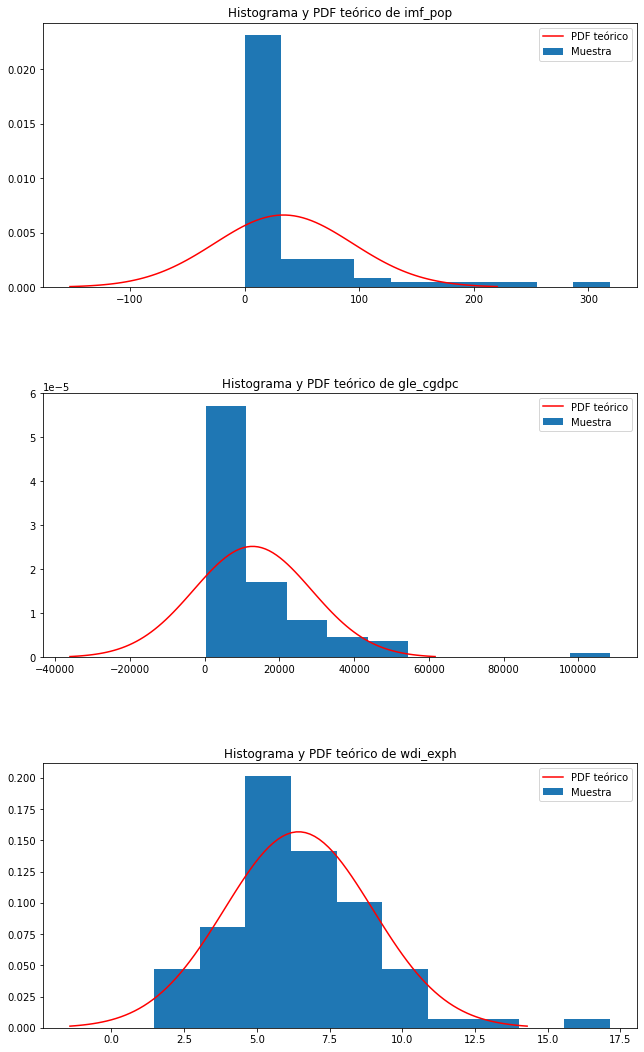

In [6]:
from scipy.stats import norm

def curva_de_densidad_de_probabilidad(dataframe,variable):
    data = list(dataframe[variable].dropna())
    dist = norm(loc=np.mean(data), scale=np.std(data))
    x = np.linspace(dist.ppf(0.001),
                    dist.ppf(0.999), 100)
    plt.hist(data, density = True, label = "Muestra")
    plt.plot(x, dist.pdf(x), "r-", label = "PDF teórico")
    plt.legend()
    plt.title(f"Histograma y PDF teórico de {variable}")

j = 1
vars = ['imf_pop', 'gle_cgdpc', 'wdi_exph']

plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=1.5, 
                    top=3.5,
                    wspace= 0.5, 
                    hspace=0.4)

for i in vars:
    plt.subplot(len(vars),1,j)
    j += 1
    curva_de_densidad_de_probabilidad(df, i)
